In [2]:
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
df = pd.read_csv('mesto_ua.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Комиссия,Спальных мест,Класс,Высота потолков м,Домов,Количество квартир,Отопление,Очередей,Паркинг,Стены,Утепление,Этажность,Цена за
0,Закревского,3.0,73,42,10,9.0,9.0,раздельные комнаты,панельный,панельный,пластиковые,центральное,58900 $,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Юнацька,1.0,"44,5","16,8","12,3",3.0,9.0,раздельные комнаты,новострой,блочный,NaN,индивидуальное,80000 $,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Рейтарська,2.0,63,30,25,3.0,5.0,раздельные комнаты,дореволюционное,кирпичный,пластиковые,центральное,130000 $,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Голосеевская,1.0,60,30,14,14.0,25.0,студия,элитный новострой,кирпичный,пластиковые,центральное,125000 $,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,отсутствует,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ул. Маршала Малиновского Дом 36,3.0,74,38,8,4.0,9.0,студия,чешка,NaN,пластиковые,центральное,93000 $,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,отсутствует,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15405 entries, 0 to 15404
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Адрес                15402 non-null  object 
 1   Комнат               15402 non-null  float64
 2   Площадь              15366 non-null  object 
 3   Площадь жилая        12947 non-null  object 
 4   Площадь кухни        13600 non-null  object 
 5   Этаж                 15251 non-null  float64
 6   Всего этажей         13284 non-null  float64
 7   Планировка           7838 non-null   object 
 8   Тип здания           7012 non-null   object 
 9   Тип стен             4678 non-null   object 
 10  Тип окон             3448 non-null   object 
 11  Тип отопления        2986 non-null   object 
 12  Цена                 15402 non-null  object 
 13  Описание             15405 non-null  object 
 14  URL                  15405 non-null  object 
 15  Комиссия             2194 non-null  

In [5]:
df = df.drop(['Комиссия', "Спальных мест", "Класс ", "Высота потолков м", "Домов ", "Количество квартир ", "Отопление ", "Очередей ", "Паркинг ", "Стены ", "Утепление ", "Этажность ", "Цена за "], axis=1)
df.head()

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL
0,Закревского,3.0,73,42,10,9.0,9.0,раздельные комнаты,панельный,панельный,пластиковые,центральное,58900 $,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar
1,Юнацька,1.0,"44,5","16,8","12,3",3.0,9.0,раздельные комнаты,новострой,блочный,NaN,индивидуальное,80000 $,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar
2,Рейтарська,2.0,63,30,25,3.0,5.0,раздельные комнаты,дореволюционное,кирпичный,пластиковые,центральное,130000 $,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar
3,Голосеевская,1.0,60,30,14,14.0,25.0,студия,элитный новострой,кирпичный,пластиковые,центральное,125000 $,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar
4,Ул. Маршала Малиновского Дом 36,3.0,74,38,8,4.0,9.0,студия,чешка,NaN,пластиковые,центральное,93000 $,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar


In [6]:
def change_type(x):
    if ',' in x:
        return float('.'.join(str(x).split(',')))
    else:
        return float(x)

In [7]:
def get_currency(x):
    if '.' in str(x):
        return str(x).split()[1][:-1]
    else:
        return str(x).split()[1]

## Saving labeler encoders

In [8]:
label_encoders = {                                                                                                                                      
    'street': LabelEncoder().fit(df['Адрес'].fillna('-1').str.title()),
    'planning': LabelEncoder().fit(df['Планировка'].fillna('-1')),
    'building_type': LabelEncoder().fit(df['Тип здания'].fillna('-1')),
    'wall_type': LabelEncoder().fit(df['Тип стен'].fillna('-1')),
    'window_type': LabelEncoder().fit(df['Тип окон'].fillna('-1')),
    'heating_type': LabelEncoder().fit(df['Тип отопления'].fillna('-1')),
}

## Encoding columns with categoric values and nan to -1

In [9]:
df['Адрес'] = label_encoders['street'].transform(df['Адрес'].fillna('-1').str.title())
df['Планировка'] = label_encoders['planning'].transform(df['Планировка'].fillna('-1'))
df['Тип здания'] = label_encoders['building_type'].transform(df['Тип здания'].fillna('-1'))
df['Тип стен'] = label_encoders['wall_type'].transform(df['Тип стен'].fillna('-1'))
df['Тип окон'] = label_encoders['window_type'].transform(df['Тип окон'].fillna('-1'))
df['Тип отопления'] = label_encoders['heating_type'].transform(df['Тип отопления'].fillna('-1'))
df['Цена'] = df['Цена'].fillna('-1')                                                                   

## Getting only usd and hrn prices

In [10]:
df = df[(df['Цена'].str.contains('грн'))|(df['Цена'].str.contains('\$'))].copy()

## Getting the currency and removing it from the price

In [11]:
df['Валюта'] = df['Цена'].apply(get_currency)
label_encoders['currency'] = LabelEncoder().fit(df['Валюта'].fillna('-1'))
df['Цена'] = df['Цена'].apply(lambda x: int(str(x).split()[0]))
df['Валюта'] = label_encoders['currency'].transform(df['Валюта'])

## Filling the numeric columns with -1 and changing the type to int

In [12]:
df['Этаж'] = df['Этаж'].fillna('-1')
df['Всего этажей'] = df['Всего этажей'].fillna('-1')
df['Этаж'] = df['Этаж'].astype('int32') # changing the type from str to int
df['Всего этажей'] = df['Всего этажей'].astype('int32')

## Filling area columns with -1 and changing the type to int

In [13]:
df['Площадь'] = df['Площадь'].fillna('-1')
df['Площадь жилая'] = df['Площадь жилая'].fillna('-1')
df['Площадь кухни'] = df['Площадь кухни'].fillna('-1')
df['Площадь'] = df['Площадь'].apply(change_type)
df['Площадь кухни'] = df['Площадь кухни'].apply(change_type)
df['Площадь жилая'] = df['Площадь жилая'].apply(change_type)

In [14]:
df

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Валюта
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,314,2.0,38.0,25.0,8.0,1,5,0,0,4,0,0,35500,"Продаётся двухкомнатная квартира на Дарнице по улице Вифлеемская,4 на 1/5 этажного дома площадью 38/25/8.Квартира в хорошем жилом состоянии,комнат...",https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/2-j-mikrorajon/vifleemskaya-ulitsa/15197853.html?tar,0
15401,1925,3.0,127.0,51.0,-1.0,14,-1,0,0,2,0,0,250000,Срочно продам новострой 3 комнатную квартиру по ул Саксаганского 70-А после строителей; 14 этаж/19ти этажного кирпичного дома;из инвестиционного ф...,https://kiev.mesto.ua/sale/goloseevskij-rajon/ulitsa-saksaganskogo/15029289.html?tar,0
15402,604,2.0,46.0,30.0,7.0,2,5,0,0,0,0,0,80000,"Продается 2-х комнатная квартира, Шевченковский район, центр, ул. Жилянская 104/24, 46 кв.м , 2 этаж 5 этажного дома. Окна и балкон квартиры выхо...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179519.html?tar,0
15403,604,1.0,39.0,-1.0,12.0,3,23,0,0,0,0,0,78000,"Продается 1 комнатная квартира, центр, Голосеевский район, ЖК 38 Жемчужина, ул. Жилянская 68, 39 кв.м, 3/23 этажного дома. Квартира без ремонта, п...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179518.html?tar,0


In [15]:
df[(df.isna().any(axis=1))] # checking if there are nan values left

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Валюта


In [16]:
label_encoders['currency'].classes_ # making sure that currency labels are only 2

array(['$', 'грн'], dtype=object)

In [17]:
df.info() # checking dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15381 entries, 0 to 15404
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Адрес          15381 non-null  int32  
 1   Комнат         15381 non-null  float64
 2   Площадь        15381 non-null  float64
 3   Площадь жилая  15381 non-null  float64
 4   Площадь кухни  15381 non-null  float64
 5   Этаж           15381 non-null  int32  
 6   Всего этажей   15381 non-null  int32  
 7   Планировка     15381 non-null  int32  
 8   Тип здания     15381 non-null  int32  
 9   Тип стен       15381 non-null  int32  
 10  Тип окон       15381 non-null  int32  
 11  Тип отопления  15381 non-null  int32  
 12  Цена           15381 non-null  int64  
 13  Описание       15381 non-null  object 
 14  URL            15381 non-null  object 
 15  Валюта         15381 non-null  int32  
dtypes: float64(4), int32(9), int64(1), object(2)
memory usage: 1.5+ MB


In [18]:
df = df.reset_index().drop('index', axis=1)

In [19]:
almost_garbage = []
uncertain = []
for i in range(0, len(df)):
    incorrects = [x for x in df.iloc[i] if x == -1]
    if len(incorrects) > 3:
        almost_garbage.append(i)
    elif len(incorrects) < 2 and len(incorrects) != 0:
        uncertain.append(i)

In [20]:
label_encoders['currency'].classes_

array(['$', 'грн'], dtype=object)

In [21]:
df[df['Тип стен']==0]

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Валюта
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0
7,1945,3.0,90.0,-1.0,14.0,20,25,2,0,0,2,2,130000,Продажа без посредников Я ХОЗЯИН\r,https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/urlovskaya-ulitsa/15140142.html?tar,0
17,1373,3.0,90.0,52.0,11.0,6,7,2,0,0,0,0,100000,"Победы пр.96. Квартира в современном доме с функциональной планировкой, эксклюзивный дизайн, натяжной потолок, люстры, финская мебель, шкаф-купе, ...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/prospekt-pobedyi/15301100.html?tar,0
18,1118,2.0,78.0,33.0,19.0,13,25,0,0,0,0,0,84900,"В этой квартире начнется ваша новая жизнь, в которой не будет места спорам- у кого больше комната или кто сколько времени проводит в ванной, потом...",https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/ulitsa-dragomanova/14692119.html?tar,0
22,547,2.0,64.0,29.0,17.0,23,25,0,0,0,0,0,80000,"Дом №3 секция Б, сдача в первом квартале 2020",https://kiev.mesto.ua/sale/darnitskij-rajon/dneprovskaya-naberezhnaya/15301099.html?tar,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15363,1550,3.0,78.8,45.0,10.0,2,9,2,0,0,0,0,130000,"Продаю квартиру в ЖК ""Комфорт Таун"".",https://kiev.mesto.ua/sale/dneprovskij-rajon/regeneratornaya-ulitsa/14662794.html?tar,0
15364,688,4.0,205.0,106.0,19.0,8,22,0,67,0,0,0,1300000,"Продается престижная 4 к. квартира с изысканным ремонтом в самом сердце Киева. ЖК ""Липская Башня"". Рядом Мариинский парк, скверы, детские и спорти...",https://kiev.mesto.ua/sale/pecherskij-rajon/institutskaya-ulitsa/14398179.html?tar,0
15378,604,2.0,46.0,30.0,7.0,2,5,0,0,0,0,0,80000,"Продается 2-х комнатная квартира, Шевченковский район, центр, ул. Жилянская 104/24, 46 кв.м , 2 этаж 5 этажного дома. Окна и балкон квартиры выхо...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179519.html?tar,0
15379,604,1.0,39.0,-1.0,12.0,3,23,0,0,0,0,0,78000,"Продается 1 комнатная квартира, центр, Голосеевский район, ЖК 38 Жемчужина, ул. Жилянская 68, 39 кв.м, 3/23 этажного дома. Квартира без ремонта, п...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179518.html?tar,0


In [22]:
def extract_district(x):
    import re
    x = x[7:]
    values = [el for el in x.split('/')]
    for el in values:
        if re.match('\w+\-rajon', el):
            return re.findall('\w+\-rajon', el)[0]
    return '-1'

extract_district('https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar')
# (lambda x: x[7:].split('/')[3])

'desnyanskij-rajon'

In [23]:
df['Район'] = df['URL'].apply(extract_district)

In [24]:
df

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Валюта,Район
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0,desnyanskij-rajon
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0,solomenskij-rajon
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0,shevchenkovskij-rajon
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0,goloseevskij-rajon
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0,obolonskij-rajon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,314,2.0,38.0,25.0,8.0,1,5,0,0,4,0,0,35500,"Продаётся двухкомнатная квартира на Дарнице по улице Вифлеемская,4 на 1/5 этажного дома площадью 38/25/8.Квартира в хорошем жилом состоянии,комнат...",https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/2-j-mikrorajon/vifleemskaya-ulitsa/15197853.html?tar,0,darnitskij-rajon
15377,1925,3.0,127.0,51.0,-1.0,14,-1,0,0,2,0,0,250000,Срочно продам новострой 3 комнатную квартиру по ул Саксаганского 70-А после строителей; 14 этаж/19ти этажного кирпичного дома;из инвестиционного ф...,https://kiev.mesto.ua/sale/goloseevskij-rajon/ulitsa-saksaganskogo/15029289.html?tar,0,goloseevskij-rajon
15378,604,2.0,46.0,30.0,7.0,2,5,0,0,0,0,0,80000,"Продается 2-х комнатная квартира, Шевченковский район, центр, ул. Жилянская 104/24, 46 кв.м , 2 этаж 5 этажного дома. Окна и балкон квартиры выхо...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179519.html?tar,0,goloseevskij-rajon
15379,604,1.0,39.0,-1.0,12.0,3,23,0,0,0,0,0,78000,"Продается 1 комнатная квартира, центр, Голосеевский район, ЖК 38 Жемчужина, ул. Жилянская 68, 39 кв.м, 3/23 этажного дома. Квартира без ремонта, п...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179518.html?tar,0,goloseevskij-rajon


In [25]:
label_encoders['district'] = LabelEncoder().fit(df['Район'])
label_encoders['district'].classes_

array(['-1', 'darnitskij-rajon', 'desnyanskij-rajon', 'dneprovskij-rajon',
       'goloseevskij-rajon', 'obolonskij-rajon', 'pecherskij-rajon',
       'podolskij-rajon', 'shevchenkovskij-rajon', 'solomenskij-rajon',
       'svyatoshinskij-rajon'], dtype=object)

In [26]:
df['Район'] = label_encoders['district'].transform(df['Район'])

In [27]:
df

,Адрес,Комнат,Площадь,Площадь жилая,Площадь кухни,Этаж,Всего этажей,Планировка,Тип здания,Тип стен,Тип окон,Тип отопления,Цена,Описание,URL,Валюта,Район
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0,9
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0,8
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0,4
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,314,2.0,38.0,25.0,8.0,1,5,0,0,4,0,0,35500,"Продаётся двухкомнатная квартира на Дарнице по улице Вифлеемская,4 на 1/5 этажного дома площадью 38/25/8.Квартира в хорошем жилом состоянии,комнат...",https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/2-j-mikrorajon/vifleemskaya-ulitsa/15197853.html?tar,0,1
15377,1925,3.0,127.0,51.0,-1.0,14,-1,0,0,2,0,0,250000,Срочно продам новострой 3 комнатную квартиру по ул Саксаганского 70-А после строителей; 14 этаж/19ти этажного кирпичного дома;из инвестиционного ф...,https://kiev.mesto.ua/sale/goloseevskij-rajon/ulitsa-saksaganskogo/15029289.html?tar,0,4
15378,604,2.0,46.0,30.0,7.0,2,5,0,0,0,0,0,80000,"Продается 2-х комнатная квартира, Шевченковский район, центр, ул. Жилянская 104/24, 46 кв.м , 2 этаж 5 этажного дома. Окна и балкон квартиры выхо...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179519.html?tar,0,4
15379,604,1.0,39.0,-1.0,12.0,3,23,0,0,0,0,0,78000,"Продается 1 комнатная квартира, центр, Голосеевский район, ЖК 38 Жемчужина, ул. Жилянская 68, 39 кв.м, 3/23 этажного дома. Квартира без ремонта, п...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179518.html?tar,0,4


In [28]:
df.columns = ['street', 'rooms', 'total_area', 'living_area', 'kitchen_area', 'floor', 'floor_count', 'planning', 'building_type', 'wall_type', 'window_type', 'heating_type', 'price', 'description', 'URL', 'currency', 'district']
df

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price,description,URL,currency,district
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0,9
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0,8
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0,4
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,314,2.0,38.0,25.0,8.0,1,5,0,0,4,0,0,35500,"Продаётся двухкомнатная квартира на Дарнице по улице Вифлеемская,4 на 1/5 этажного дома площадью 38/25/8.Квартира в хорошем жилом состоянии,комнат...",https://kiev.mesto.ua/sale/darnitskij-rajon/zhiloj-massiv-poznyaki/2-j-mikrorajon/vifleemskaya-ulitsa/15197853.html?tar,0,1
15377,1925,3.0,127.0,51.0,-1.0,14,-1,0,0,2,0,0,250000,Срочно продам новострой 3 комнатную квартиру по ул Саксаганского 70-А после строителей; 14 этаж/19ти этажного кирпичного дома;из инвестиционного ф...,https://kiev.mesto.ua/sale/goloseevskij-rajon/ulitsa-saksaganskogo/15029289.html?tar,0,4
15378,604,2.0,46.0,30.0,7.0,2,5,0,0,0,0,0,80000,"Продается 2-х комнатная квартира, Шевченковский район, центр, ул. Жилянская 104/24, 46 кв.м , 2 этаж 5 этажного дома. Окна и балкон квартиры выхо...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179519.html?tar,0,4
15379,604,1.0,39.0,-1.0,12.0,3,23,0,0,0,0,0,78000,"Продается 1 комнатная квартира, центр, Голосеевский район, ЖК 38 Жемчужина, ул. Жилянская 68, 39 кв.м, 3/23 этажного дома. Квартира без ремонта, п...",https://kiev.mesto.ua/sale/goloseevskij-rajon/zhilyanskaya-ulitsa/15179518.html?tar,0,4


In [29]:
hryvnya = df[df['currency']==1].copy() # df.drop(df[df['currency']==1].index)
hryvnya

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price,description,URL,currency,district
79,648,3.0,104.9,47.1,32.9,16,24,2,41,0,0,0,3150000,"Продается видовая квартира в ЖК"" Славутич 2.0"" ул. Заречная 16. Комплекс находится на набережной Днепра, возле метро Славутич (остановка рядом). 1...",https://kiev.mesto.ua/sale/darnitskij-rajon/rajon-nizhnie-sadyi/zarechnaya-ulitsa/15053896.html?tar,1,1
81,164,1.0,42.0,17.2,12.7,14,24,2,41,0,0,0,989000,"С ПОСРЕДНИКАМИ НЕ СОТРУДНИЧАЕМ!!!! Продаётся 1-но комнатная квартира на Минском массиве в ЖК ""Бережанский"" по улице Бережанской, 15. Дом №3. Кварт...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-vyishgorodskij/berezhanskaya-ulitsa/15053892.html?tar,1,5
120,1597,2.0,70.3,40.5,13.1,10,17,2,41,0,0,0,2213000,"2 к, Киев, Продажа 2х комн квартиры по улице Маланюка 101, дом 31 (ранее Сагайдака). Кирпичный дом, потолки 3 метра. Сдача 3 кв. 2020 года. Метро ...",https://kiev.mesto.ua/sale/dneprovskij-rajon/mikrorajon-nikolskaya-slobodka/ulitsa-evgeniya-malanyuka/15282257.html?tar,1,3
133,422,3.0,76.5,45.0,9.0,24,25,0,0,0,0,0,1200000,"С ПОСРЕДНИКАМИ НЕ СОТРУДНИЧАЕМ! Продаю 3к квартиру Киев, Голосеевский, в ЖК Эврика, дом №25, 76,53/45/9 кв.м., 24 этаж 25 этажного дома, м. Иппод...",https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-goloseev/prospekt-akademika-glushkova/15164300.html?tar,1,4
188,693,3.0,119.5,60.5,12.5,23,24,2,41,0,0,0,5310000,Продается изумительная ВИДОВАЯ 2-УРОВНЕВАЯ 3-комнатная квартира в новом сданном Доме от Киевгорстрой по ул. Патриса Лумумбы 11. Общая площадь квар...,https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-ioanna-pavla-/14925283.html?tar,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,9663435,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,1,6
15330,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,8662055,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,1,6
15366,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,2700000,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,1,7
15367,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,5908950,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,1,7


In [30]:
hryvnya['price'] = hryvnya['price'] / 24.6
hryvnya['currency'] = 0
hryvnya['price'] = hryvnya['price'].astype('int64')
hryvnya

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price,description,URL,currency,district
79,648,3.0,104.9,47.1,32.9,16,24,2,41,0,0,0,128048,"Продается видовая квартира в ЖК"" Славутич 2.0"" ул. Заречная 16. Комплекс находится на набережной Днепра, возле метро Славутич (остановка рядом). 1...",https://kiev.mesto.ua/sale/darnitskij-rajon/rajon-nizhnie-sadyi/zarechnaya-ulitsa/15053896.html?tar,0,1
81,164,1.0,42.0,17.2,12.7,14,24,2,41,0,0,0,40203,"С ПОСРЕДНИКАМИ НЕ СОТРУДНИЧАЕМ!!!! Продаётся 1-но комнатная квартира на Минском массиве в ЖК ""Бережанский"" по улице Бережанской, 15. Дом №3. Кварт...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-vyishgorodskij/berezhanskaya-ulitsa/15053892.html?tar,0,5
120,1597,2.0,70.3,40.5,13.1,10,17,2,41,0,0,0,89959,"2 к, Киев, Продажа 2х комн квартиры по улице Маланюка 101, дом 31 (ранее Сагайдака). Кирпичный дом, потолки 3 метра. Сдача 3 кв. 2020 года. Метро ...",https://kiev.mesto.ua/sale/dneprovskij-rajon/mikrorajon-nikolskaya-slobodka/ulitsa-evgeniya-malanyuka/15282257.html?tar,0,3
133,422,3.0,76.5,45.0,9.0,24,25,0,0,0,0,0,48780,"С ПОСРЕДНИКАМИ НЕ СОТРУДНИЧАЕМ! Продаю 3к квартиру Киев, Голосеевский, в ЖК Эврика, дом №25, 76,53/45/9 кв.м., 24 этаж 25 этажного дома, м. Иппод...",https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-goloseev/prospekt-akademika-glushkova/15164300.html?tar,0,4
188,693,3.0,119.5,60.5,12.5,23,24,2,41,0,0,0,215853,Продается изумительная ВИДОВАЯ 2-УРОВНЕВАЯ 3-комнатная квартира в новом сданном Доме от Киевгорстрой по ул. Патриса Лумумбы 11. Общая площадь квар...,https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-ioanna-pavla-/14925283.html?tar,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,0,6
15330,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,0,6
15366,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,0,7
15367,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,0,7


In [31]:
df = df.drop(df[df['currency']==1].index)
df = df.append(hryvnya).reset_index()
df

,index,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price,description,URL,currency,district
0,0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0,2
1,1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0,9
2,2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0,8
3,3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0,4
4,4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,15329,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,0,6
15377,15330,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,0,6
15378,15366,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,0,7
15379,15367,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,0,7


In [32]:
df = df.drop('index', axis=1)

In [33]:
df

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price,description,URL,currency,district
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,0,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,0,9
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,0,8
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,0,4
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,0,6
15377,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,0,6
15378,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,0,7
15379,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,0,7


In [34]:
df = df.rename(columns={'price': 'price_usd'})

In [35]:
df = df.drop('currency', axis=1)

In [36]:
df

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,9
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,8
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,4
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,6
15377,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,6
15378,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,7
15379,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,7


In [37]:
clustering_df = df.copy()
clustering_df.head()

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,9
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,8
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,4
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,5


In [38]:
clustering_df['desc_len'] = clustering_df['description'].apply(lambda x: len([el for el in x.split() if len(el)>3]))
clustering_df['ad_completion_in_%'] = clustering_df.apply(lambda x: int(abs((list(x.values).count(-1)/15)*100 - 100)), axis=1) # feature engineering the ad completion and description attributes
clustering_df

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district,desc_len,ad_completion_in_%
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,2,38,100
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,9,92,100
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,8,52,100
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,4,5,100
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,5,68,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,6,54,93
15377,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,6,55,93
15378,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,7,193,100
15379,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,7,189,100


In [39]:
def check_unique():
    from nltk.tokenize import word_tokenize
    import string
    from collections import Counter
    all_words = []
    for val in clustering_df['description']:
        all_words.extend([str(x).lower() for x in word_tokenize(val) if x not in string.punctuation and len(x)>2])
    
    return pd.DataFrame(Counter(all_words).most_common(), index=range(0, len(Counter(all_words).most_common()))).rename(columns={0: 'word', 1:'quantity'})

#words = check_unique()
#words.head()

In [40]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [41]:
kmeans = KMeans(n_clusters=3, init='random', n_init=20, max_iter=400, random_state=0).fit(clustering_df.drop(['URL', 'description'], axis=1))
predictions = kmeans.predict(clustering_df.drop(['URL', 'description'], axis=1))
predictions

array([2, 2, 2, ..., 2, 2, 2])

In [42]:
clustering_df['targets_params'] = predictions
clustering_df

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district,desc_len,ad_completion_in_%,targets_params
0,627,3.0,73.0,42.0,10.0,9,9,2,42,4,2,2,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,2,38,100,2
1,2099,1.0,44.5,16.8,12.3,3,9,2,41,1,0,1,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,9,92,100,2
2,1556,2.0,63.0,30.0,25.0,3,5,2,30,2,2,2,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,8,52,100,2
3,446,1.0,60.0,30.0,14.0,14,25,4,67,2,2,2,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,4,5,100,2
4,1832,3.0,74.0,38.0,8.0,4,9,4,66,0,2,2,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,5,68,100,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,812,2.0,105.9,55.4,27.3,22,-1,0,0,0,0,0,392822,"2 кімн., 22/25 цег, 105.9/55.4/27.3, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своєю закр...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967030.html?tar,6,54,93,0
15377,812,2.0,97.6,44.9,28.1,21,-1,0,0,0,0,0,352116,"2 кімн., 21/25 цег, 97.6/44.9/28.1, х-окр, спецпроект 2011-2015 рр, апартаменти розташовані в центрі Печерського району в клубному будинку зі своє...",https://kiev.mesto.ua/sale/pecherskij-rajon/ulitsa-evgeniya-konovaltsa/12967029.html?tar,6,55,93,0
15378,1165,2.0,60.0,32.0,12.0,3,9,2,0,2,0,0,109756,"Предлагается вашему вниманию 2 комнатная квартира с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса RYBALSKY ! Комплекс находи...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276490.html?tar,7,193,100,2
15379,1165,4.0,131.0,72.0,34.0,3,9,2,0,2,0,0,240201,"Предлагается вашему вниманию 4 комнатная 131метр, квартира на 3эт/9этажного с Видом на обводной канал, в эксклюзивном жилом комплексе люкс класса ...",https://kiev.mesto.ua/sale/podolskij-rajon/naberezhno-ryibalskaya-doroga/15276489.html?tar,7,189,100,2


In [43]:
for key in label_encoders.keys():
    for column in clustering_df.columns:
        if key == column:
            clustering_df[column] = label_encoders[key].inverse_transform(clustering_df[column])

clustering_df.head()

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district,desc_len,ad_completion_in_%,targets_params
0,Закревского,3.0,73.0,42.0,10.0,9,9,раздельные комнаты,панельный,панельный,пластиковые,центральное,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,desnyanskij-rajon,38,100,2
1,Юнацька,1.0,44.5,16.8,12.3,3,9,раздельные комнаты,новострой,блочный,-1,индивидуальное,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,solomenskij-rajon,92,100,2
2,Рейтарська,2.0,63.0,30.0,25.0,3,5,раздельные комнаты,дореволюционное,кирпичный,пластиковые,центральное,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,shevchenkovskij-rajon,52,100,2
3,Голосеевская,1.0,60.0,30.0,14.0,14,25,студия,элитный новострой,кирпичный,пластиковые,центральное,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,goloseevskij-rajon,5,100,2
4,Ул. Маршала Малиновского Дом 36,3.0,74.0,38.0,8.0,4,9,студия,чешка,-1,пластиковые,центральное,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,obolonskij-rajon,68,100,2


In [44]:
class_0_params = clustering_df[clustering_df['targets_params']==0].copy()
class_1_params = clustering_df[clustering_df['targets_params']==1].copy()
class_2_params = clustering_df[clustering_df['targets_params']==2].copy()

In [45]:
class_0_params.info(), class_1_params.info(), class_2_params.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 6 to 15377
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   street              1591 non-null   object 
 1   rooms               1591 non-null   float64
 2   total_area          1591 non-null   float64
 3   living_area         1591 non-null   float64
 4   kitchen_area        1591 non-null   float64
 5   floor               1591 non-null   int32  
 6   floor_count         1591 non-null   int32  
 7   planning            1591 non-null   object 
 8   building_type       1591 non-null   object 
 9   wall_type           1591 non-null   object 
 10  window_type         1591 non-null   object 
 11  heating_type        1591 non-null   object 
 12  price_usd           1591 non-null   int64  
 13  description         1591 non-null   object 
 14  URL                 1591 non-null   object 
 15  district            1591 non-null   object 
 16  desc_

(None, None, None)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans

tfidf_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('kmeans', MiniBatchKMeans(n_clusters=3, init='random', random_state=0))])

In [47]:
tfidf_clf.fit(clustering_df['description'])
predictions_tfidf = tfidf_clf.predict(clustering_df['description'])
predictions_tfidf

array([2, 1, 1, ..., 2, 2, 2])

In [48]:
clustering_df['targets_text'] = predictions_tfidf
clustering_df.head()

,street,rooms,total_area,living_area,kitchen_area,floor,floor_count,planning,building_type,wall_type,window_type,heating_type,price_usd,description,URL,district,desc_len,ad_completion_in_%,targets_params,targets_text
0,Закревского,3.0,73.0,42.0,10.0,9,9,раздельные комнаты,панельный,панельный,пластиковые,центральное,58900,"Закревского, 37 9/9 этажного дома, над квартирой высокий техэтаж, затем чердак. Дизайнерский ремонт, прекрасная транспортная развязка, замечатель...",https://kiev.mesto.ua/sale/desnyanskij-rajon/mikrorajon-miloslavichi/ulitsa-nikolaya-zakrevskogo/15154679.html?tar,desnyanskij-rajon,38,100,2,2
1,Юнацька,1.0,44.5,16.8,12.3,3,9,раздельные комнаты,новострой,блочный,-1,индивидуальное,80000,"44,5\16,8\12,3; Повністю готова для проживання квартира з дизайнерським ремонтом у затишному і сучасному ЖК Паркленд. Щойно закінчено ремонт та ...",https://kiev.mesto.ua/sale/solomenskij-rajon/posyolok-zhulyanyi/yunosheskaya-ulitsa/15284930.html?tar,solomenskij-rajon,92,100,2,1
2,Рейтарська,2.0,63.0,30.0,25.0,3,5,раздельные комнаты,дореволюционное,кирпичный,пластиковые,центральное,130000,"63,0\30,0\25,0. Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...",https://kiev.mesto.ua/sale/shevchenkovskij-rajon/rejtarskaya-ulitsa/15074527.html?tar,shevchenkovskij-rajon,52,100,2,1
3,Голосеевская,1.0,60.0,30.0,14.0,14,25,студия,элитный новострой,кирпичный,пластиковые,центральное,125000,Продам 1 ком квартиру Голосеевский район ул.Голосеевская 13а\r,https://kiev.mesto.ua/sale/goloseevskij-rajon/mikrorajon-demeevka/goloseevskaya-ulitsa/15202679.html?tar,goloseevskij-rajon,5,100,2,1
4,Ул. Маршала Малиновского Дом 36,3.0,74.0,38.0,8.0,4,9,студия,чешка,-1,пластиковые,центральное,93000,"Без комиссии. От хозяина. Очень уютная, теплая, светлая квартира. На две стороны, не угловая. Установлены счетчики на газ, горячую и холодную воду...",https://kiev.mesto.ua/sale/obolonskij-rajon/zhiloj-massiv-obolon/3-j-mikrorajon/ulitsa-marshala-malinovskogo/15300598.html?tar,obolonskij-rajon,68,100,2,2


In [49]:
class_0_text = clustering_df[clustering_df['targets_text']==0].copy()
class_1_text = clustering_df[clustering_df['targets_text']==1].copy()
class_2_text = clustering_df[clustering_df['targets_text']==2].copy()

In [50]:
class_0_text.info(), class_1_text.info(), class_2_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 37 to 15377
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   street              242 non-null    object 
 1   rooms               242 non-null    float64
 2   total_area          242 non-null    float64
 3   living_area         242 non-null    float64
 4   kitchen_area        242 non-null    float64
 5   floor               242 non-null    int32  
 6   floor_count         242 non-null    int32  
 7   planning            242 non-null    object 
 8   building_type       242 non-null    object 
 9   wall_type           242 non-null    object 
 10  window_type         242 non-null    object 
 11  heating_type        242 non-null    object 
 12  price_usd           242 non-null    int64  
 13  description         242 non-null    object 
 14  URL                 242 non-null    object 
 15  district            242 non-null    object 
 16  desc_

(None, None, None)

In [51]:
matrix = TfidfVectorizer().fit_transform(class_0_text['description'])
vectorizer = TfidfVectorizer().fit(class_0_text['description'])
vectorizer.get_feature_names()

['05м',
 '10',
 '100',
 '100м',
 '101м',
 '103',
 '105',
 '105м',
 '106',
 '107м',
 '108м',
 '109м',
 '10а',
 '10м',
 '10п',
 '11',
 '110м',
 '111м',
 '115м',
 '11п',
 '12',
 '120м',
 '122м',
 '124',
 '125м',
 '128',
 '128м',
 '12п',
 '13',
 '130',
 '130м',
 '131',
 '132',
 '133м',
 '134',
 '135',
 '137м',
 '13а',
 '13б',
 '13п',
 '14',
 '144м',
 '149м',
 '14п',
 '15',
 '150м',
 '155м',
 '15п',
 '16',
 '160м',
 '162м',
 '163м',
 '165м',
 '16б',
 '16п',
 '17',
 '170м',
 '17213',
 '17214',
 '17215',
 '17217',
 '17250',
 '17252',
 '17254',
 '17255',
 '17257',
 '17258',
 '17259',
 '17260',
 '17261',
 '17262',
 '173м',
 '17а',
 '18',
 '180м',
 '18п',
 '19',
 '190',
 '190м',
 '199',
 '1994',
 '19п',
 '1к',
 '20',
 '2003',
 '2005',
 '2006',
 '2008',
 '200м',
 '2010',
 '2011',
 '2012',
 '2015',
 '204',
 '20а',
 '20п',
 '21',
 '22',
 '22п',
 '23',
 '24',
 '25',
 '25387',
 '25п',
 '26',
 '26п',
 '27',
 '270м',
 '27341',
 '27342',
 '27343',
 '28',
 '29а',
 '2к',
 '2камерні',
 '2м',
 '2хв',
 '31п'

In [94]:
def remove_nums(text):
    import string
    new_text = []
    no_digit = True
    for el in text.split():
        for c in list(el):
            if c in string.digits:
                no_digit = False
                break
        if no_digit and len(el)>2:
            new_text.append(el)
        
        no_digit = True
    
    return ' '.join(new_text)

remove_nums('Царський будинок. Без ліфта. Неповторна квартира в центрі міста! Ремонту 6 років. Просторі та світлі кімнати. Висота стелі 3.7м. В...')

'Царський будинок. Без ліфта. Неповторна квартира центрі міста! Ремонту років. Просторі світлі кімнати. Висота стелі В...'

In [96]:
class_0_text['description'] = class_0_text['description'].apply(remove_nums)
class_1_text['description'] = class_1_text['description'].apply(remove_nums)
class_2_text['description'] = class_2_text['description'].apply(remove_nums)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D62E549E8>]],
      dtype=object)

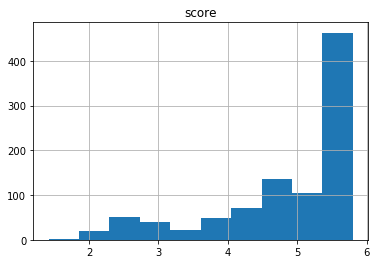

In [130]:
vectorizer0 = TfidfVectorizer().fit(class_0_text['description'])
values_words = dict(zip(vectorizer0.get_feature_names(), vectorizer0.idf_))
words_df_cls0 = pd.DataFrame({'word': list(values_words.keys()), 'score': list(values_words.values())}, index=range(0,len(values_words)))
del values_words
words_df_cls0.sort_values('score', ascending=False).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D63480DD8>]],
      dtype=object)

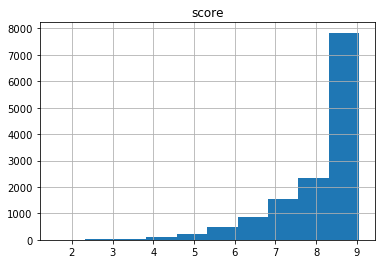

In [131]:
vectorizer1 = TfidfVectorizer().fit(class_1_text['description'])
values_words = dict(zip(vectorizer1.get_feature_names(), vectorizer1.idf_))
words_df_cls1 = pd.DataFrame({'word': list(values_words.keys()), 'score': list(values_words.values())}, index=range(0,len(values_words)))
del values_words
words_df_cls1.sort_values('score', ascending=False).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D63255438>]],
      dtype=object)

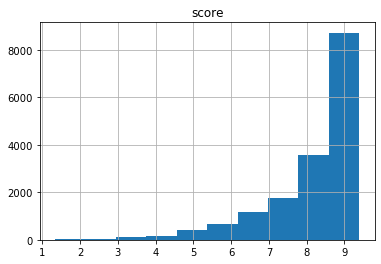

In [132]:
vectorizer2 = TfidfVectorizer().fit(class_2_text['description'])
values_words = dict(zip(vectorizer2.get_feature_names(), vectorizer2.idf_))
words_df_cls2 = pd.DataFrame({'word': list(values_words.keys()), 'score': list(values_words.values())}, index=range(0,len(values_words)))
del values_words
words_df_cls2.sort_values('score', ascending=False).hist()